# Problem 1 
Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically  estimate the variance).

In [93]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Load data generated in data_generation.ipynb

input_file_path = "data_100000_100013059.csv"
df = pd.read_csv(input_file_path)


## Hoeffding inequality

Let $X_1, ..., X_n$ be i.i.d. random variables, bounded by the intervals $a_i \leq X_i \leq b_i$. Let the empirical mean be defined according to $\overline{X} = \frac{1}{n} \sum_{i=1}^n X_i$. It holds that: $$ P(|\overline{X} - \mathbb{E}[\overline{X}]| \geq \epsilon) \leq 2e^{-\frac{2n\epsilon^2}{\sum_{i=1}^n(a_i - b_i)^2}} $$

To find the Confidence Interval (CI) with confidence level $1 - \alpha$ (e.g., 0.95 for 95%), we set the right side equal to $\alpha$ and solve for the margin of error $\epsilon$:

$$ \epsilon = (b-a)\sqrt(\frac{\ln{2/\alpha}}{2N})$$

### Gaussian distribution

Gaussian distribution is unbounded, so for illustrating the confidence interval using Hoeffding inequality we can choose to truncate to a certain range. We will use an interval (b-a) = $3\sigma/4$ centered around the theoretical mean $\mu$.

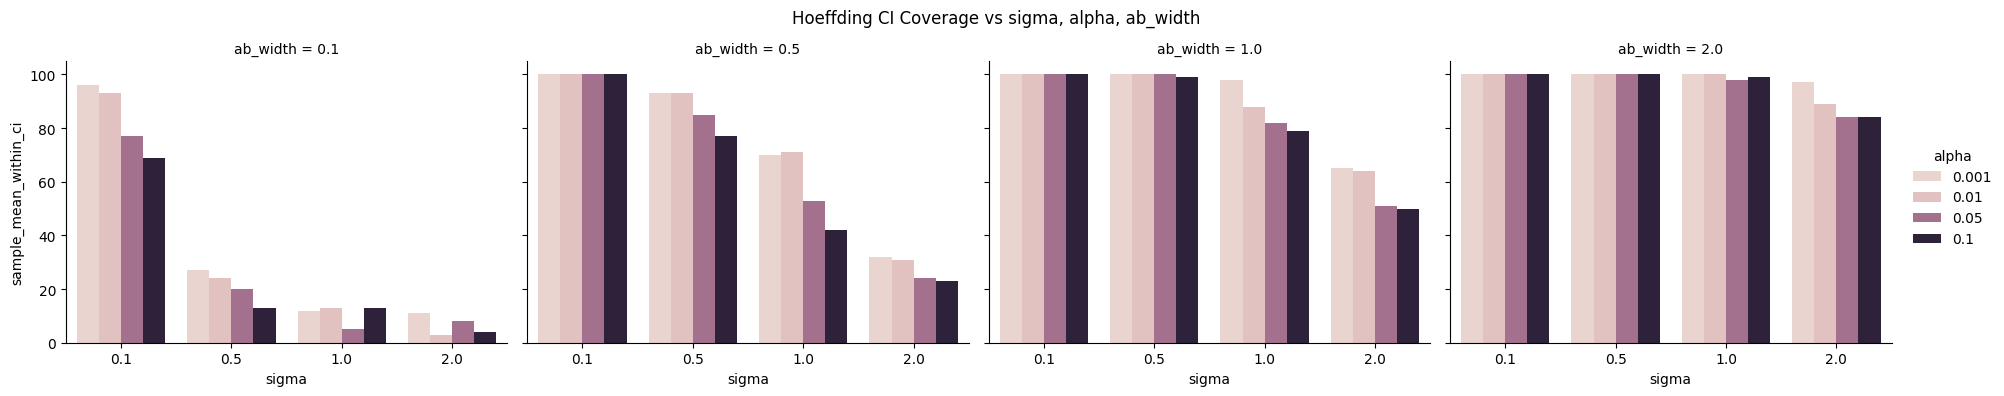

In [ ]:
# Hoeffding inequality of Gaussian distribution using b-a = sigma to determine the ci interval

def get_gaussian_hoeffding_data(mu, sigma, alpha, bounding_interval_width, N):
    dist = rng.normal(mu, sigma, size=N)
    sample_mean = dist.mean()     # Sample mean
    # Hoeffding bound
    a, b = mu - bounding_interval_width/2, mu + bounding_interval_width/2
    range_width = b - a   
    epsilon = range_width * np.sqrt(np.log(2 / alpha) / (2 * N))
    lower_bound = sample_mean - epsilon
    upper_bound = sample_mean + epsilon
    return (
        "gaussian",
        mu,
        sigma,
        alpha,
        bounding_interval_width,
        n,
        epsilon,
        upper_bound-lower_bound,
        lower_bound <= mu <= upper_bound
    )

column_names = ["distribution", "mu", "sigma", "alpha", "ab_width", "N", "epsilon", "ci_width", "sample_mean_within_ci"]

alphas = [0.001, 0.01, 0.05, 0.1]
sigmas = [0.1, 0.5, 1, 2]
bounding_interval_widths = [0.1, 0.25, 0.51, 1]
sample_sizes = [10000]
data_rows = []

num_repetitions = 100
mu = 0

rng = np.random.default_rng()
for sigma in sigmas:
    for alpha in alphas:
        for bw in bounding_interval_widths:
            for n in sample_sizes:         
                for r in range(num_repetitions):          
                    data_rows.append(get_gaussian_hoeffding_data(mu, sigma, alpha, bw, n))
            


df_results_hoeffding = pd.DataFrame(
    data_rows,
    columns=column_names
)

summary = (
    df_results_hoeffding.groupby(["sigma", "alpha", "ab_width"])["sample_mean_within_ci"]
      .sum()   # sum of booleans = count of True
      .reset_index(name="sample_mean_within_ci")
)

#summary["sample_mean_within_ci"] = 100.0 * summary["sample_mean_within_ci"] / num_repetitions

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)
summary

sns.catplot(
    data=summary,
    x="sigma", y="sample_mean_within_ci",
    hue="alpha", col="ab_width",
    kind="bar", height=4, aspect=1.2
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Hoeffding CI Coverage vs sigma, alpha, ab_width")
plt.show()



With the dataset "normal mu=0 sigma=0.5" for $\alpha=0.5$ (95% confidence interval) we get a margin of error $\epsilon=0.01826$.

## Chebishev inequality

For any R.V (Random Variable)  $X$ and for *any*  positive number $\lambda > 0$: $$ Pr(|X-\mathbb{E}[X]| \geq \lambda) \leq \frac{Var(X)}{\lambda^2} $$